## L'objectif va être de prédire si une citrouille est blanche ou orange avec une régression logistique

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../../../data/US-pumpkins.csv")

df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
## on séléctionne juste les features qui nous intéressent
columns_to_select = ["City Name", "Package", "Variety", "Origin", "Item Size", "Color"]
pumpkins = df.loc[:,columns_to_select]  

In [9]:
## on supprime les lignes avec des valeurs nulles
pumpkins.dropna(inplace= True)
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


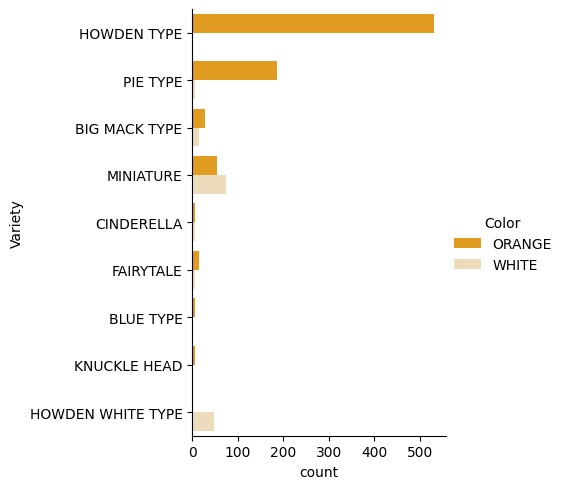

In [22]:
palette = {"ORANGE": "orange",
           "WHITE": "wheat"}

sns.catplot(data=pumpkins, y="Variety", hue="Color", kind="count", palette=palette)
plt.show()

On remarque que les nombres de citrouilles par catégories est unbalanced (déséquilibrée), on dit que nos données sont skewed (baisé / asymétrique), il va falloir faire des transfromations avant d'utiliser nos données comme les transformer de façon numérique.

In [ ]:
## on regarde les différents résultats de la feature item size
pumpkins["Item Size"].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

Nous avons à faire à des données qui suivent une continuité, on dit qu'elle sont ordinales. On va utiliser le **OrdinalEncoder**

In [13]:
from sklearn.preprocessing import OrdinalEncoder
item_size_categories = [['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo']]
ordinal_features = ["Item Size"]
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

Les autres features n'ont pas d'implied order donc on va utiliser le **OneHotEncoder**

In [14]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["City Name", "Package", "Variety", "Origin"]
categorical_encoder = OneHotEncoder(sparse_output=False)

In [15]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[("ord", ordinal_encoder, ordinal_features),
                                     ("cat", categorical_encoder, categorical_features)
                                     ])

## on veut que la sortie soit en pandas
ct.set_output(transform="pandas")
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins["Color"])
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
list(label_encoder.inverse_transform([0,1]))

['ORANGE', 'WHITE']

/tmp/ipykernel_18997/3875242550.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=pumpkins, x= "Item Size", y= "Color", row= "Variety",
/home/batou/Documents/Programmation/environnement_python/data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


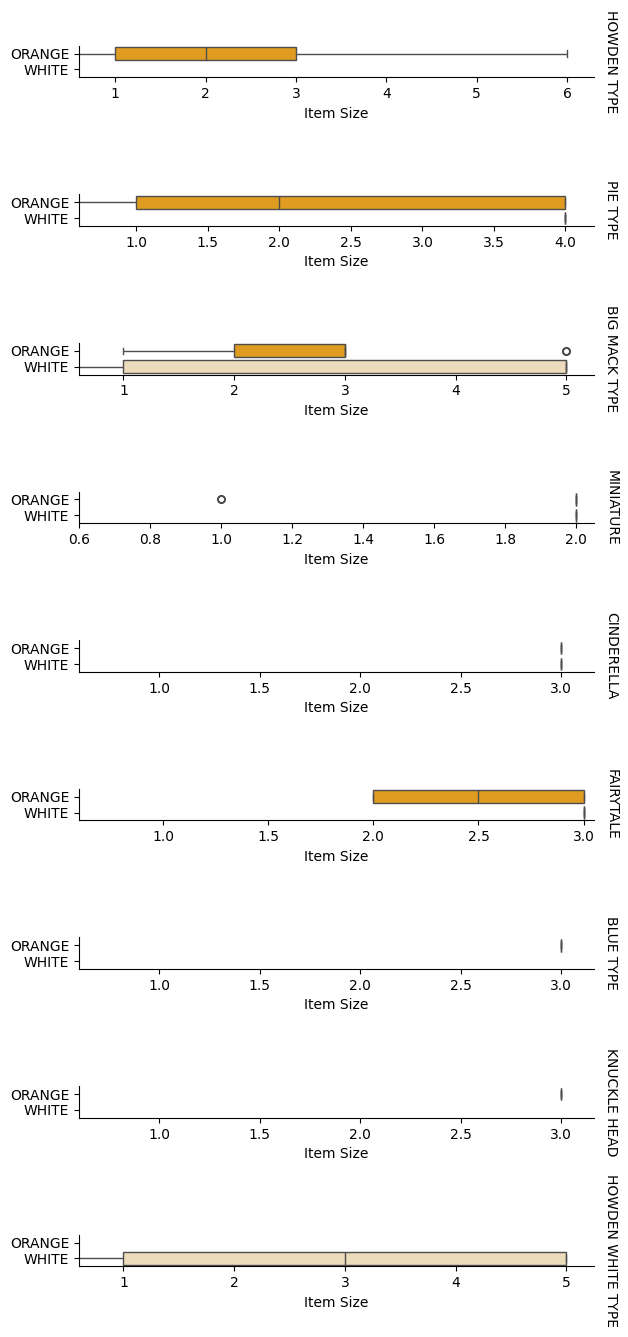

In [23]:
palette = {"ORANGE": "orange",
           "WHITE": "wheat"}

## Il faut encoder l'item size colum pour l'utiliser comme l'axe x de notre graphique
pumpkins["Item Size"] = encoded_pumpkins["ord__Item Size"]

g = sns.catplot(data=pumpkins, x= "Item Size", y= "Color", row= "Variety",
                kind="box", orient="h",
                sharex=False, margin_titles=True,
                height=1.5, aspect=4, palette=palette
                )

g.set(xlabel="Item Size", ylabel="").set(xlim=(0.6))
g.set_titles(row_template="{row_name}")

plt.show()


On va ensuite utiliser un swarmplot pour comprendre la relation entre l'item size et la couleur

Étant donné que Color est une catégorie binaire (Blanche ou Non), on va faire une analyse par essaim

/tmp/ipykernel_18997/2723439523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
/home/batou/Documents/Programmation/environnement_python/data_science/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/batou/Documents/Programmation/environnement_python/data_science/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/batou/Documents/Programmation/environnement_python/data_science/lib/python3.12/site-packages/seaborn/categorical.py:3399: User

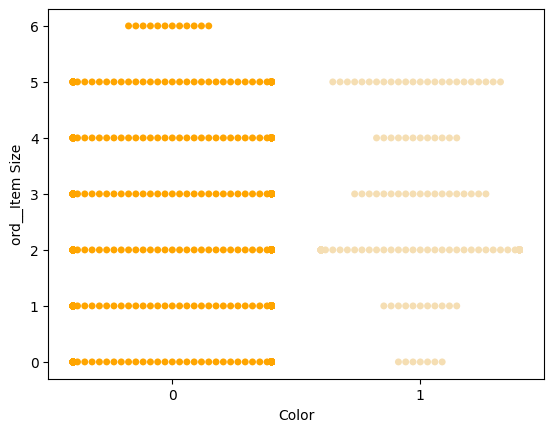

In [24]:
palette = {"0": "orange",
           "1": "wheat"}

sns.swarmplot(x="Color", y="ord__Item Size", data=encoded_pumpkins, palette=palette)
plt.show()

Nos données ont plutot une bonne forme et nous allons pouvoir construire une régression logistique pour prédire la couleur d'une citrouille en se basant sur plusieurs features

In [25]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins[encoded_pumpkins.columns.difference(["Color"])]

y = encoded_pumpkins["Color"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Evaluation du modele 

In [28]:
print(classification_report(y_test, predictions))
print("Labels predites : ", predictions)
print("F1-score : ", f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       166
           1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199

Labels predites :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
F1-score :  0.7457627118644068


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 11,  22]])

on a 162 VN orange prédiction et 22 white prédiction VP, on a 4 citrouilles mal prédites comme white FP, et 11 onze citrouilles négatives FN

Nous allons utilisé le **ROC CURVES**, c'est un graph qui permet d'analyser la performance d'un classifieur binaire. (il est utilisé quand les distributions des classes sont déséquilibrées ce qui est notre cas)

In [30]:
y.value_counts(normalize=True)


Color
0    0.842583
1    0.157417
Name: proportion, dtype: float64

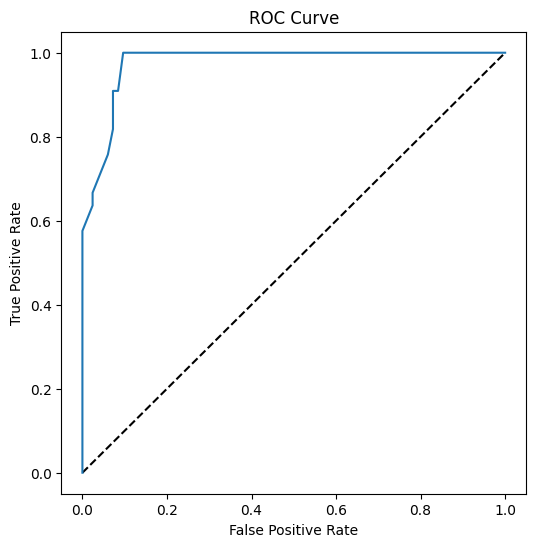

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

On calcule ensuite l'aire sous la courbe ROC

In [32]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9759036144578312
